# Selenium Assignment

Install selenium library

In [158]:
!pip install selenium

###### Set path for webdriver

1.Check version of chrome

2.Download chrome dirver by using this link 'https://chromedriver.chromium.org/downloads' 

3.After that extract .exe file and copy the path

In [2]:
#import needed libraries
from selenium import webdriver
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

Q1: Write a python program to scrape data for “Data Analyst” Job position in “Bangalore” location. You have to scrape the job-title, job-location, company_name, experience_required. You have to scrape first 10 jobs data.
This task will be done in following steps:
1. First get the webpage https://www.naukri.com/ 
2. Enter “Data Analyst” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the location” field.
3. Then click the search button.
4. Then scrape the data for the first 10 jobs results you get.
5. Finally create a dataframe of the scraped data.

###### 1.First get the webpage https://www.naukri.com/

In [189]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.naukri.com/')

###### 2.Enter “Data Analyst” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the location” field.

In [190]:
#for job search bar
search_for_job_role=driver.find_element_by_xpath('/html/body/div/div[2]/div[3]/div/div/div[1]/div/div/div/input')
search_for_job_role.send_keys('Data Analyst')

#for location search bar
search_job_location=driver.find_element_by_xpath('/html/body/div/div[2]/div[3]/div/div/div[3]/div/div/div/input')
search_job_location.send_keys('Bangalore')

###### 3.Then click the search button.

In [191]:
#for clicking search button
search_button=driver.find_element_by_xpath('/html/body/div/div[2]/div[3]/div/div/div[6]')
search_button.click()

###### 4.Then scrape the data for the first 10 jobs results you get.

1.Job Title

In [163]:
job_title=[]
title_tags=driver.find_elements_by_xpath('//a[@class="title fw500 ellipsis"]')
for val in title_tags:
    job_title.append(val.text)

2.Company Name

In [164]:
company_name=[]
company_tags=driver.find_elements_by_xpath('//a[@class="subTitle ellipsis fleft"]')
for val in company_tags:
    company_name.append(val.text)

3.Company Rating

In [165]:
company_rating=[]
rating_tags=driver.find_elements_by_xpath('//span[@class="starRating fleft dot"]')
for x in rating_tags:
    company_rating.append(x.text)
company_rating.insert(8,np.NaN)
company_rating.insert(12,np.NaN)

4.Number of Reviews

In [166]:
reviews=[]
review_tags=driver.find_elements_by_xpath('//a[@class="reviewsCount ml-5 fleft blue-text "]')
for val in review_tags:
    reviews.append(val.text.replace('(','').replace(')','').split()[0])
#convert object to integer
for x in range(0,len(reviews)):
    reviews[x]=int(reviews[x])
reviews.insert(8,np.NaN)
reviews.insert(12,np.NaN)

5.Experience

In [167]:
experience=[]
experience_tags=driver.find_elements_by_xpath('//li[@class="fleft grey-text br2 placeHolderLi experience"]/span[1]')
for val in experience_tags:
    experience.append(val.text)

6.Salary

In [168]:
salary=[]
salary_tags=driver.find_elements_by_xpath('//li[@class="fleft grey-text br2 placeHolderLi salary"]/span[1]')
for val in salary_tags:
    salary.append(val.text)

7.location

In [169]:
location=[]
location_tags=driver.find_elements_by_xpath('//li[@class="fleft grey-text br2 placeHolderLi location"]/span[1]')
for val in location_tags:
    location.append(val.text.replace('/Bengaluru',''))

8.posted time

In [170]:
time=[]
time_tags=driver.find_elements_by_xpath('//span[@class="fleft fw500"]')
for x in time_tags:
    time.append(x.text)
for x in time:
    if x=='PREFERRED' or x=='HOT JOB':
        time.remove(x)

9.Terms and conditions

In [171]:
terms=[]
terms_tags=driver.find_elements_by_xpath('//div[@class="job-description fs12 grey-text"]')
for val in terms_tags:
    terms.append(val.text.replace('...',''))

###### 5.Finally create a dataframe of the scraped data

In [172]:
#create dataframe by using pandas
data_analyst=pd.DataFrame({})
data_analyst['Job Title']=job_title
data_analyst['Company Name']=company_name
data_analyst['Company Rating']=company_rating
data_analyst['Number of Reviews']=reviews
data_analyst['Experience']=experience
data_analyst['Salary']=salary
data_analyst['Location']=location
data_analyst['Posted Time']=time
data_analyst['Terms And Conditions']=terms

In [173]:
print('First 10 jobs ')
data_analyst.head(10)

First 10 jobs 


Job Title         Company Name  \
0                   Sr Domain Expert -Data Analysts              Siemens   
1  Senior Data Analyst (Digital Services Analytics)    Dell Technologies   
2                               Senior Data Analyst                Intel   
3  Required Senior Data Analyst - Brickwork Ratings    Brickwork Ratings   
4                 Staff Business Data Analyst - FDP          Intuit Inc.   
5                                      Data Analyst  Vedantu Innovations   
6                                    Data Analyst 2               PayPal   
7                  Senior Professional Data Analyst       DXC Technology   
8     Data Analyst - Python/Artificial Intelligence    iMindYourBusiness   
9                                MDM - Data Analyst                Shell   

  Company Rating  Number of Reviews Experience                    Salary  \
0            4.2             2682.0   0-10 Yrs             Not disclosed   
1            4.1             3114.0    1-6 Yrs             Not disclosed   
2            4.4              304.0    3-8 Yrs             Not disclosed   
3            3.5               68.0    2-3 Yrs             Not disclosed   
4            3.7               59.0    5-7 Yrs             Not disclosed   
5            3.5              571.0    0-3 Yrs  5,00,000 - 11,00,000 PA.   
6            4.3              246.0    5-8 Yrs             Not disclosed   
7            3.7             5302.0    3-7 Yrs             Not disclosed   
8            NaN                NaN    0-2 Yrs             Not disclosed   
9            4.3              911.0    3-4 Yrs             Not disclosed   

                                            Location  Posted Time  \
0                                          Bangalore    1 DAY AGO   
1                                          Bangalore    1 DAY AGO   
2                                          Bangalore    1 DAY AGO   
3                                          Bangalore    1 DAY AGO   
4                                          Bangalore   6 DAYS AGO   
5                                          Bangalore  14 DAYS AGO   
6                                          Bangalore    1 DAY AGO   
7                                          Bangalore   3 DAYS AGO   
8  Kolkata, Mumbai, Visakhapatnam, Hyderabad/Secu...    1 DAY AGO   
9                                          Bangalore    1 DAY AGO   

                                Terms And Conditions  
0  Must be able to manage a team of 5 and guide t...  
1  Experience with web analytics tools, such as A...  
2  Bachelor / Master in Engineering in Computer S...  
3  Understand the day-to-day operations of the bu...  
4  Proficient with SQL to perform data acquisitio...  
5  The ideal candidate will use their passion for...  
6  Bachelors Degree in a quantitative discipline ...  
7  Role Responsibilities: Supporting the Audit te...  
8  Candidates must have ability to work from home...  
9  The Role• Manages key elements of one or more ...

In [174]:
#close the web driver
driver.close()

Q2: Write a python program to scrape data for “Data Scientist” Job position in “Bangalore” location. You have to scrape the job-title, job-location, company_name. You have to scrape first 10 jobs data.

This task will be done in following steps: 
1. First get the webpage https://www.naukri.com/ 
2.  Enter “Data Scientist” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the location” field. 
3. Then click the search button. 
4. Then scrape the data for the first 10 jobs results you get. 
5. Finally create a dataframe of the scraped data.

###### 1.First get the webpage 'https://www.naukri.com/'

In [195]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.naukri.com/')

###### 2.Enter “Data Scientist” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the location” field.

In [176]:
#for job search bar
search_for_job_role=driver.find_element_by_xpath('/html/body/div/div[2]/div[3]/div/div/div[1]/div/div/div/input')
search_for_job_role.send_keys('Data Scientist')

#for location search bar
search_job_location=driver.find_element_by_xpath('/html/body/div/div[2]/div[3]/div/div/div[3]/div/div/div/input')
search_job_location.send_keys('Bangalore')

###### 3.Then click the search button.

In [177]:
#for clicking search button
search_button=driver.find_element_by_xpath('/html/body/div/div[2]/div[3]/div/div/div[6]')
search_button.click()

###### 4.Then scrape the data for the first 10 jobs results you get.

1.Job Title

In [178]:
job_title=[]
title_tags=driver.find_elements_by_xpath('//a[@class="title fw500 ellipsis"]')
for val in title_tags:
    job_title.append(val.text)

2.Company Name

In [179]:
company_name=[]
company_tags=driver.find_elements_by_xpath('//a[@class="subTitle ellipsis fleft"]')
for val in company_tags:
    company_name.append(val.text)

3.Company Rating

In [180]:
company_rating=[]
rating_tags=driver.find_elements_by_xpath('//span[@class="starRating fleft dot"]')
for x in rating_tags:
    company_rating.append(x.text)
company_rating.insert(7,np.NaN)
company_rating.insert(14,np.NaN)
company_rating.insert(15,np.NaN)
company_rating.insert(16,np.NaN)

4.Number Reviews

In [181]:
reviews=[]
review_tags=driver.find_elements_by_xpath('//a[@class="reviewsCount ml-5 fleft blue-text "]')
for val in review_tags:
    reviews.append(val.text.replace('(','').replace(')','').split()[0])
#convert object to integer
for x in range(0,len(reviews)):
    reviews[x]=int(reviews[x])
reviews.insert(7,np.NaN)
reviews.insert(14,np.NaN)
reviews.insert(15,np.NaN)
reviews.insert(16,np.NaN)

5.Experience

In [182]:
experience=[]
experience_tags=driver.find_elements_by_xpath('//li[@class="fleft grey-text br2 placeHolderLi experience"]/span[1]')
for val in experience_tags:
    experience.append(val.text)

6.Salary

In [183]:
salary=[]
salary_tags=driver.find_elements_by_xpath('//li[@class="fleft grey-text br2 placeHolderLi salary"]/span[1]')
for val in salary_tags:
    salary.append(val.text)

7.location

In [184]:
location=[]
location_tags=driver.find_elements_by_xpath('//li[@class="fleft grey-text br2 placeHolderLi location"]/span[1]')
for val in location_tags:
    location.append(val.text.replace('/Bengaluru',''))

8.Posted Time

In [185]:
time=[]
time_tags=driver.find_elements_by_xpath('//span[@class="fleft fw500"]')
for x in time_tags:
    time.append(x.text)
for x in time:
    if x=='PREFERRED' or x=='HOT JOB':
        time.remove(x)
time.remove('PREMIUM')

9.Terms and Conditions

In [186]:
terms=[]
terms_tags=driver.find_elements_by_xpath('//div[@class="job-description fs12 grey-text"]')
for val in terms_tags:
    terms.append(val.text.replace('...',''))

###### 5.Finally create a dataframe of the scraped data.

In [187]:
#create dataframe by using pandas
data_scientist=pd.DataFrame({})
data_scientist['Job Title']=job_title
data_scientist['Company Name']=company_name
data_scientist['Company Rating']=company_rating
data_scientist['Number of Reviews']=reviews
data_scientist['Experience']=experience
data_scientist['Salary']=salary
data_scientist['Location']=location
data_scientist['Posted Time']=time
data_scientist['Terms And Conditions']=terms

In [188]:
print('First 10 jobs ')
data_scientist.head(10)

First 10 jobs 


Job Title  \
0                              Senior Data Scientist   
1                              Senior Data Scientist   
2                              Junior Data Scientist   
3     DATA Scientist with Fraud Analytics Experience   
4         Data Scientist II- Merchandise & Discovery   
5                           Principal Data Scientist   
6               Senior Data Scientist/Data Scientist   
7                              Senior Data Scientist   
8                           Principal Data Scientist   
9  Data Scientist Opportunity with PayU ( Tier1 i...   

                                   Company Name Company Rating  \
0                                      Flipkart            4.1   
1                                     GSK India            4.2   
2                                     Accenture            4.1   
3                                    Concentrix            4.1   
4                                        Swiggy            4.1   
5                                        Meesho            3.4   
6  Tredence Analytics Solutions Private Limited            3.9   
7                              Zoom Start India            NaN   
8                                 Rakuten, Inc.            4.0   
9                                          PayU            4.1   

   Number of Reviews Experience                   Salary  \
0             7201.0    5-8 Yrs            Not disclosed   
1              997.0    5-9 Yrs            Not disclosed   
2            24009.0    2-6 Yrs            Not disclosed   
3            11708.0    2-4 Yrs  3,00,000 - 4,00,000 PA.   
4             1477.0    2-5 Yrs            Not disclosed   
5              265.0   6-10 Yrs            Not disclosed   
6               72.0    2-7 Yrs            Not disclosed   
7                NaN    3-6 Yrs            Not disclosed   
8               85.0   7-12 Yrs            Not disclosed   
9              165.0    2-5 Yrs            Not disclosed   

                                          Location Posted Time  \
0                                        Bangalore   1 DAY AGO   
1                                        Bangalore   1 DAY AGO   
2                                        Bangalore   1 DAY AGO   
3                                        Bangalore   1 DAY AGO   
4                                        Bangalore   1 DAY AGO   
5                                        Bangalore   1 DAY AGO   
6       Pune, Gurgaon/Gurugram, Chennai, Bangalore   1 DAY AGO   
7                                        Bangalore   1 DAY AGO   
8                                        Bangalore   1 DAY AGO   
9  Gurgaon/Gurugram, Bangalore, Mumbai (All Areas)   1 DAY AGO   

                                Terms And Conditions  
0  The candidate must have a thorough grasp of th...  
1  Responsibilities Partner with leaders from acr...  
2  Skills required Total Experience – 4 to 6 year...  
3  Job Title: Data Scientist with Fraud Analytics...  
4  Bachelors or Masters degree in a quantitative ...  
5  Conduct research collaborations with premier c...  
6  Bachelors or Masters degree in a quantitative ...  
7  Product success measurement: What goals should...  
8  Position Details - Lead a responsible research...  
9  Hello, We are looking to add a Datascientist t...

In [196]:
#close the web driver
driver.close()

Q3: In this question you have to scrape data using the filters available on the webpage as shown below: 

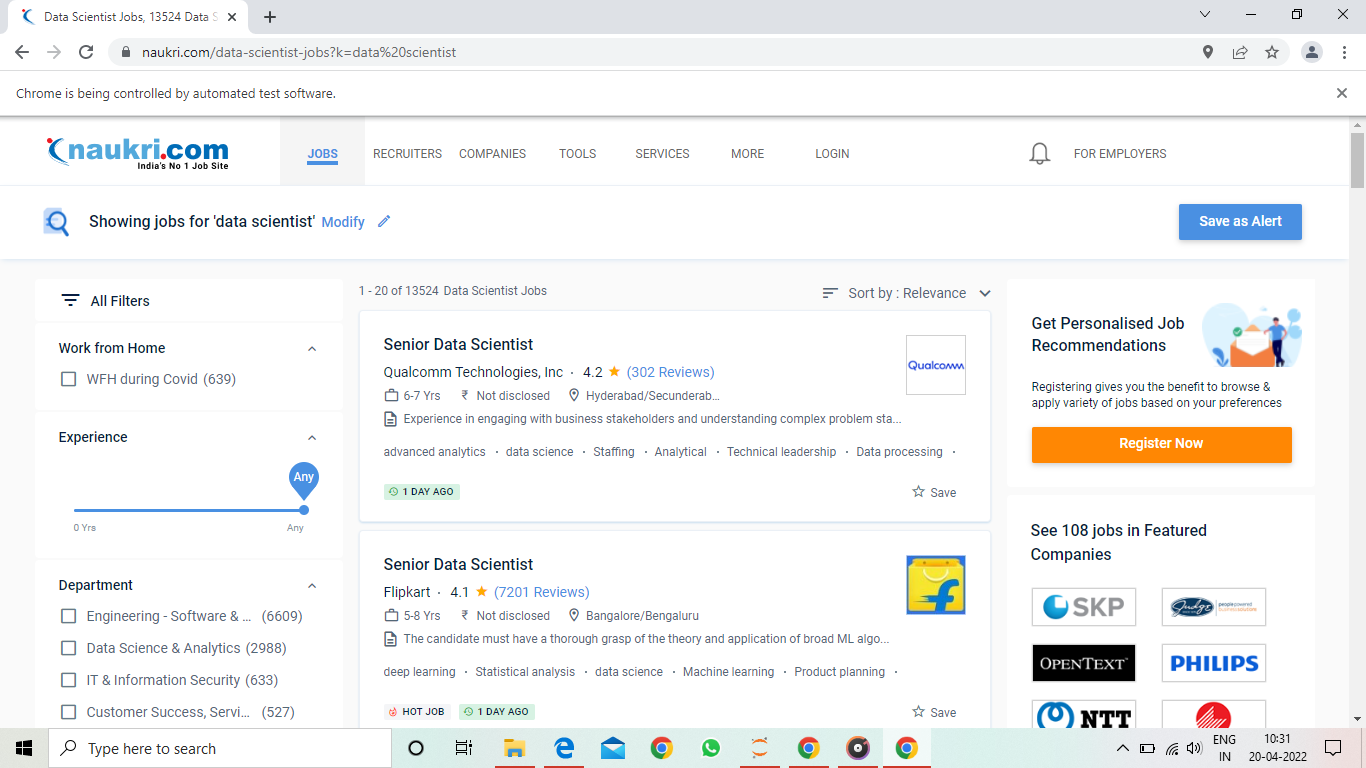

You have to use the location and salary filter.

You have to scrape data for “Data Scientist” designation for first 10 job results.

You have to scrape the job-title, job-location, company name, experience required. 

The location filter to be used is “Delhi/NCR”. 

The salary filter to be used is “3-6” lakhs 

The task will be done as shown in the below steps: 
1. first get the webpage https://www.naukri.com/ 
2. Enter “Data Scientist” in “Skill, Designations, and Companies” field. 
3. Then click the search button. 
4. Then apply the location filter and salary filter by checking the respective boxes 
5. Then scrape the data for the first 10 jobs results you get. 
6. Finally create a dataframe of the scraped data. 

###### 1.first get the webpage https://www.naukri.com/

In [206]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.naukri.com/')

###### 2.Enter “Data Scientist” in “Skill, Designations, and Companies” field.

In [207]:
#for job search bar
search_for_job_role=driver.find_element_by_xpath('/html/body/div/div[2]/div[3]/div/div/div[1]/div/div/div/input')
search_for_job_role.send_keys('Data Scientist')

###### 3.Then click the search button.

In [209]:
#for clicking search button
search_button=driver.find_element_by_xpath('/html/body/div/div[2]/div[3]/div/div/div[6]')
search_button.click()

###### 4.Then apply the location filter and salary filter by checking the respective boxes

In [212]:
#for salary filter
salary_filter=driver.find_element_by_xpath('/html/body/div[1]/div[3]/div[2]/section[1]/div[2]/div[1]/div[2]/div[2]/label/p/span[1]')
salary_filter.click()

In [213]:
#for location filter
location_filter=driver.find_element_by_xpath('/html/body/div[1]/div[3]/div[2]/section[1]/div[2]/div[2]/div[2]/div[3]/label/p/span[1]')
location_filter.click()

###### 5.Then scrape the data for the first 10 jobs results you get.

1.Job Title

In [214]:
job_title=[]
title_tags=driver.find_elements_by_xpath('//a[@class="title fw500 ellipsis"]')
for val in title_tags:
    job_title.append(val.text)

2.Company Name

In [217]:
company_name=[]
company_tags=driver.find_elements_by_xpath('//a[@class="subTitle ellipsis fleft"]')
for val in company_tags:
    company_name.append(val.text)

3.Job Location

In [220]:
location=[]
location_tags=driver.find_elements_by_xpath('//li[@class="fleft grey-text br2 placeHolderLi location"]/span[1]')
for val in location_tags:
    location.append(val.text.replace('/Bengaluru',''))

4.Experience

In [224]:
experience=[]
experience_tags=driver.find_elements_by_xpath('//li[@class="fleft grey-text br2 placeHolderLi experience"]/span[1]')
for val in experience_tags:
    experience.append(val.text)

###### 6.Finally create a dataframe of the scraped data.

In [228]:
data_scientist=pd.DataFrame({})
data_scientist['Job title']=job_title
data_scientist['Job Location']=location
data_scientist['Company Name']=company_name
data_scientist['Job Experience']=experience

In [230]:
print('Fisrt 10 Jobs')
data_scientist.head(10)

Fisrt 10 Jobs


Job title  \
0  Data Scientist/ Machine Learning, 2022 Passout...   
1                              Senior Data Scientist   
2                         Data Scientist (freelance)   
3                                Lead Data Scientist   
4                        Data Scientist - Python/SQL   
5                                     Data Scientist   
6                                     Data Scientist   
7      Urgent Requirement || Data Scientist || Noida   
8  AM Data Scientist - Goods & Service Tax Networ...   
9                     Data Scientist - MIND Infotech   

                                        Job Location  \
0  Hyderabad/Secunderabad, Ahmedabad, Chennai, Ba...   
1                                              Noida   
2                                   New Delhi, Delhi   
3                                   Gurgaon/Gurugram   
4  Noida, Kota, Mumbai, Chandigarh, Lucknow, Agra...   
5                                 Gurgaon, Bengaluru   
6                                          New Delhi   
7                                 Noida, Delhi / NCR   
8                                        Delhi / NCR   
9                                              Noida   

                                     Company Name Job Experience  
0                   Creative Hands HR Consultancy        0-4 Yrs  
1                                           Optum        2-7 Yrs  
2                                           2Coms        2-7 Yrs  
3                       KIA INDIA PRIVATE LIMITED       7-10 Yrs  
4                                    AVE-Promagne        3-8 Yrs  
5                                       BlackBuck        3-7 Yrs  
6                         Boston Consulting Group        2-5 Yrs  
7                                HCL Technologies        3-8 Yrs  
8  NISG (National Institute for Smart Government)        3-8 Yrs  
9        MOTHERSONSUMI INFOTECH & DESIGNS LIMITED        4-8 Yrs

In [231]:
#for driver close
driver.close()

Q4: Scrape data of first 100 sunglasses listings on flipkart.com.
You have to scrape four attributes: 
1. Brand 
2. Product Description 
3. Price 

The attributes which you have to scrape is ticked marked in the below image. 

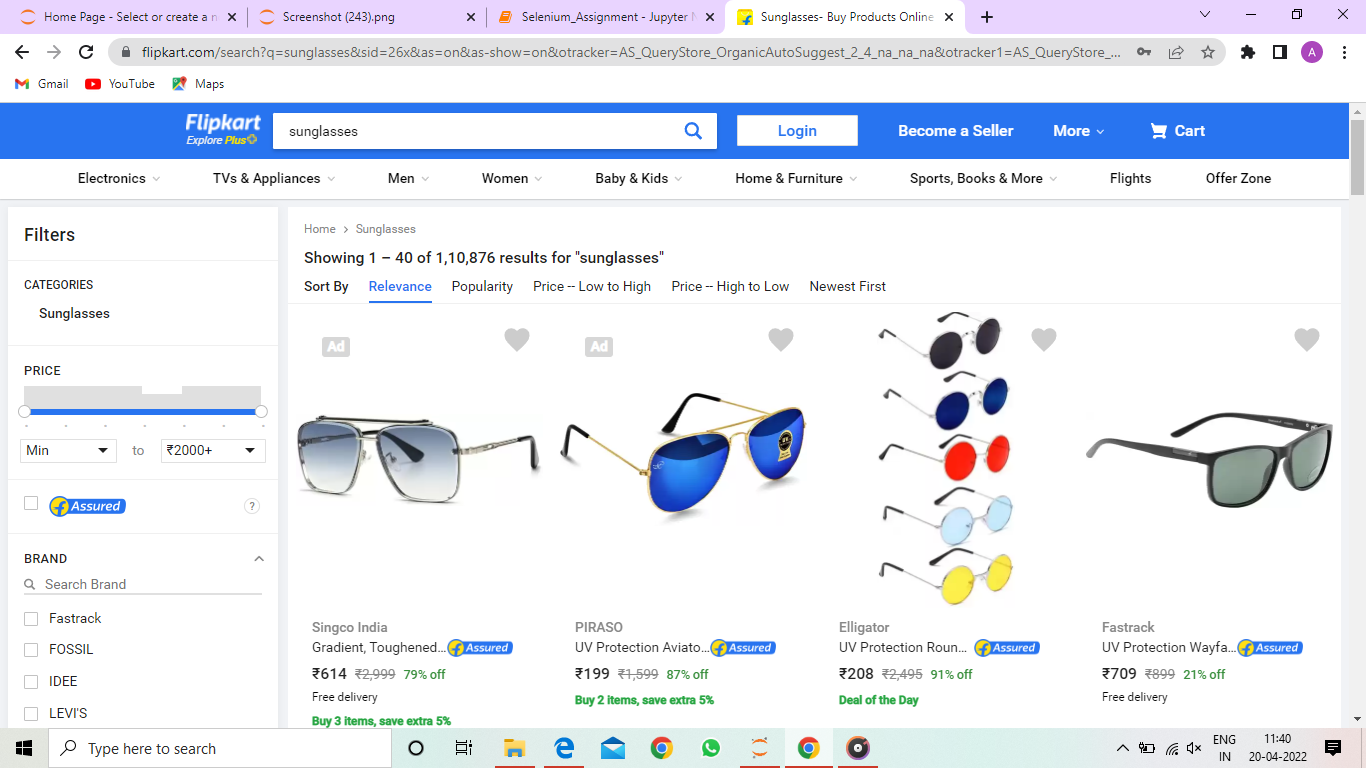

To scrape the data you have to go through following steps: 
1. Go to Flipkart webpage by url : https://www.flipkart.com/ 
2. Enter “sunglasses” in the search field where “search for products, brands andmore” is written and click the search icon 
3. After that you will reach to the page having a lot of sunglasses. From this pageyou can scrap the required data as usual. 
4. After scraping data from the first page, go to the “Next” Button at the bottom ofthe page , then click on it. 
5. Now scrape data from this page as usual 
6. Repeat this until you get data for 100 sunglasses. 

###### 1.Go to Flipkart webpage by url : https://www.flipkart.com/

In [238]:
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.flipkart.com/')

###### 2.Enter “sunglasses” in the search field where “search for products, brands andmore” is written and click the search icon

In [239]:
#for search bar
sunglasses_search_bar=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
sunglasses_search_bar.send_keys('sunglasses')

#for click search bar
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search_bar.click()

###### 3.After that you will reach to the page having a lot of sunglasses. From this page you can scrap the required data as usual.

In [300]:
brand=[]
name=[]
total_price=[]
discount=[]
selling_price=[]

1.Sunglasses Brand

In [301]:
brand_tags=driver.find_elements_by_xpath('//div[@class="_2WkVRV"]')
for val in brand_tags:
    brand.append(val.text)

2.Sunglasses Name

In [302]:
name_tags=driver.find_elements_by_xpath('//a[@class="IRpwTa"]')
for x in name_tags:
    name.append(x.text)
name_tag=driver.find_element_by_xpath('/html/body/div/div/div[3]/div[1]/div[2]/div[11]/div/div[4]/div/div[2]/a[1]')
name.append(name_tag.text)

3.Total Price

In [303]:
total_price_tags=driver.find_elements_by_xpath('//div[@class="_3I9_wc"]')
for x in total_price_tags:
    total_price.append(x.text.replace('₹',''))

4.Discount

In [304]:
discount_tags=driver.find_elements_by_xpath('//div[@class="_3Ay6Sb"]/span[1]')
for x in discount_tags:
    discount.append(x.text.replace('off',''))

5.Selling price

In [305]:
selling_price_tags=driver.find_elements_by_xpath('//div[@class="_30jeq3"]')
for x in selling_price_tags:
    selling_price.append(x.text.replace('₹',''))

###### 4.After scraping data from the first page, go to the “Next” Button at the bottom ofthe page , then click on it.

In [307]:
next_tag=driver.find_element_by_xpath('/html/body/div/div/div[3]/div[1]/div[2]/div[12]/div/div/nav/a[11]')
next_tag.click()

###### 5.Now scrape data from this page as usual

1. Sunglasses Brand

In [308]:
brand_tags=driver.find_elements_by_xpath('//div[@class="_2WkVRV"]')
for val in brand_tags:
    brand.append(val.text)

2.Sunglasses Name

In [310]:
name_tags=driver.find_elements_by_xpath('//a[@class="IRpwTa"]')
for x in name_tags:
    name.append(x.text)

3.Total Price

In [312]:
total_price_tags=driver.find_elements_by_xpath('//div[@class="_3I9_wc"]')
for x in total_price_tags:
    total_price.append(x.text.replace('₹',''))

4.Discount

In [314]:
discount_tags=driver.find_elements_by_xpath('//div[@class="_3Ay6Sb"]/span[1]')
for x in discount_tags:
    discount.append(x.text.replace('off',''))

5.Selling Price

In [316]:
selling_price_tags=driver.find_elements_by_xpath('//div[@class="_30jeq3"]')
for x in selling_price_tags:
    selling_price.append(x.text.replace('₹',''))

###### 6.Repeat this until you get data for 100 sunglasses.

In [318]:
#now 80 sunglasses are scraped
print(len(brand),len(name),len(total_price),len(discount),len(selling_price))

80 80 80 80 80


In [320]:
#for next page
next_tag=driver.find_element_by_xpath('/html/body/div/div/div[3]/div[1]/div[2]/div[12]/div/div/nav/a[12]')
next_tag.click()

1.Sunglasses Brand

In [321]:
brand_tags=driver.find_elements_by_xpath('//div[@class="_2WkVRV"]')
for val in brand_tags:
    brand.append(val.text)

2.Sunglasses Name

In [323]:
name_tags=driver.find_elements_by_xpath('//a[@class="IRpwTa"]')
for x in name_tags:
    name.append(x.text)

3.Total Price

In [325]:
total_price_tags=driver.find_elements_by_xpath('//div[@class="_3I9_wc"]')
for x in total_price_tags:
    total_price.append(x.text.replace('₹',''))

4.Discount

In [327]:
discount_tags=driver.find_elements_by_xpath('//div[@class="_3Ay6Sb"]/span[1]')
for x in discount_tags:
    discount.append(x.text.replace('off',''))

5.Selling Price

In [329]:
selling_price_tags=driver.find_elements_by_xpath('//div[@class="_30jeq3"]')
for x in selling_price_tags:
    selling_price.append(x.text.replace('₹',''))

###### 7.Finally create a dataframe of the scraped data.

In [334]:
#checking length of all columns
print(len(brand),len(name),len(total_price),len(discount),len(selling_price))

120 120 120 120 120


In [335]:
Sunglasses=pd.DataFrame({})
Sunglasses['Sunglasses Brand']=brand
Sunglasses['Sunglasses Name']=name
Sunglasses['Sunglasses Total Price']=total_price
Sunglasses['Sunglasses Discount']=discount
Sunglasses['Sunglasses Selling Price']=selling_price

In [337]:
Sunglasses

Sunglasses Brand                                    Sunglasses Name  \
0       Singco India  Gradient, Toughened Glass Lens, UV Protection ...   
1              WROGN                       Others Round Sunglasses (50)   
2          Elligator                UV Protection Round Sunglasses (54)   
3           Fastrack      UV Protection Wayfarer Sunglasses (Free Size)   
4               SRPM             UV Protection Wayfarer Sunglasses (50)   
..               ...                                                ...   
115        ROYAL SON  UV Protection, Polarized Wayfarer Sunglasses (54)   
116   kingsunglasses  UV Protection, Mirrored Aviator Sunglasses (Fr...   
117           PIRASO              UV Protection Aviator Sunglasses (58)   
118       LIZA ANGEL         UV Protection Retro Square Sunglasses (50)   
119            NuVew  UV Protection, Mirrored Wayfarer, Retro Square...   

    Sunglasses Total Price Sunglasses Discount Sunglasses Selling Price  
0                    2,999                79%                       614  
1                    2,599                36%                     1,647  
2                    2,495                91%                       208  
3                      899                21%                       709  
4                    1,299                88%                       148  
..                     ...                 ...                      ...  
115                  1,999                62%                       749  
116                  1,899                90%                       189  
117                  2,599                88%                       299  
118                    999                80%                       199  
119                  1,225                79%                       246  

[120 rows x 5 columns]

In [338]:
#for driver close
driver.close()

Q5: Scrape 100 reviews data from flipkart.com for iphone11 phone. You have to go the link: 

https://www.flipkart.com/apple-iphone-11-black-64-gb-includes-earpods-power-adapter/p/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKCTSVZAXUHGREPBFGI&marketplace 

When you will open the above link you will reach to the below shown webpage .

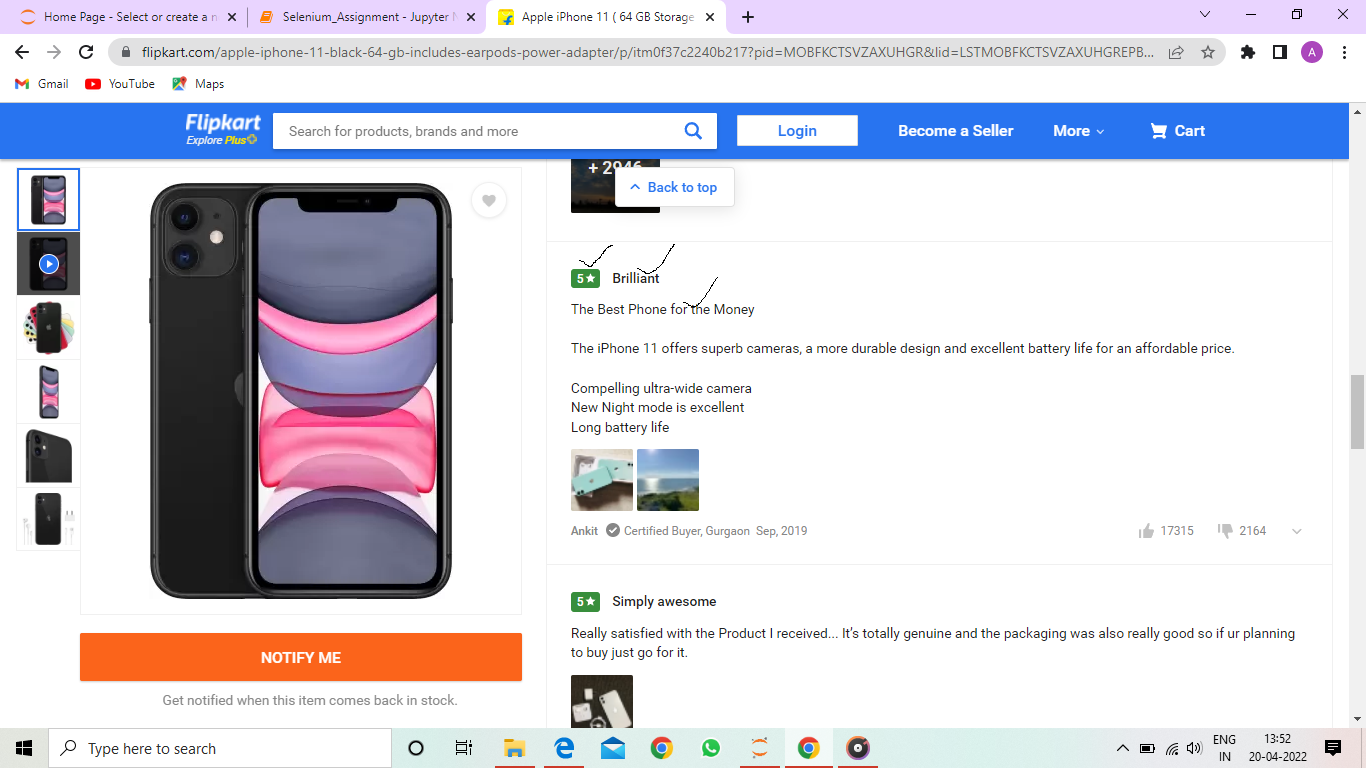

As shown in the above page you have to scrape the tick marked attributes.

These are: 
1. Rating 
2. Review summary 
3. Full review
4. You have to scrape this data for first 100 reviews. 

###### 1.Go to Flipkart webpage by url : https://www.flipkart.com/apple-iphone-11-black-64-gb-includes-earpods-power-adapter/p/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKCTSVZAXUHGREPBFGI&marketplace

In [482]:
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.flipkart.com/apple-iphone-11-black-64-gb-includes-earpods-power-adapter/p/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKCTSVZAXUHGREPBFGI&marketplace')

In [639]:
rating=[]
review_summary=[]
full_review=[]

###### 1.Scraping Rating

In [640]:
rating_tags=driver.find_elements_by_xpath('//div[@class="_3LWZlK _1BLPMq"]')
for val in rating_tags:
    rating.append(val.text)

###### 2.Scraping Review Summary

In [641]:
review_summary_tags=driver.find_elements_by_xpath('//p[@class="_2-N8zT"]')
for x in review_summary_tags:
    review_summary.append(x.text)

###### 3.Full review

In [642]:
review_tags=driver.find_elements_by_xpath('//div[@class="t-ZTKy"]')
for x in review_tags:
    full_review.append(x.text.replace('\n',' '))
    

###### 4.You have to scrape this data for first 100 reviews.

In [647]:
print(len(rating),len(review_summary),len(full_review))

10 10 10


In [655]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[11]')
next_page.click()

In [649]:
def page():
    #for rating
    rating_tags=driver.find_elements_by_xpath('//div[@class="_3LWZlK _1BLPMq"]')
    for val in rating_tags:
        rating.append(val.text)
        
    #for reveiw summary
    review_summary_tags=driver.find_elements_by_xpath('//p[@class="_2-N8zT"]')
    for x in review_summary_tags:
        review_summary.append(x.text)
    
    #for full review
    review_tags=driver.find_elements_by_xpath('//div[@class="t-ZTKy"]')
    for x in review_tags:
        full_review.append(x.text.replace('\n',' '))

In [657]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]')
next_page.click()

In [659]:
#for all rating ,rating summary and full reviews
page()

In [660]:
#checking length of all lists
print(len(rating),len(review_summary),len(full_review))

30 30 30


In [661]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]')
next_page.click()

In [662]:
#for all rating ,rating summary and full reviews
page()

In [663]:
#checking length of all lists
print(len(rating),len(review_summary),len(full_review))

40 40 40


In [666]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]')
next_page.click()

In [667]:
#for all rating ,rating summary and full reviews
page()

In [668]:
#checking length of all lists
print(len(rating),len(review_summary),len(full_review))

50 50 50


In [669]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]')
next_page.click()

In [670]:
#for all rating ,rating summary and full reviews
page()

In [671]:
# 55 rating is 1 star, so the class is different for that.
rating_tag=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[7]/div/div/div/div[1]/div')
rating.insert(54,rating_tag.text)

In [672]:
#checking length of all lists
print(len(rating),len(review_summary),len(full_review))

60 60 60


In [673]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]')
next_page.click()

In [674]:
#for all rating ,rating summary and full reviews
page()

In [675]:
# 55 rating is 1 star, so the class is different for that.
rating_tag=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[10]/div/div/div/div[1]/div')
rating.insert(68,rating_tag.text)

In [676]:
#checking length of all lists
print(len(rating),len(review_summary),len(full_review))

70 70 70


In [677]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]')
next_page.click()

In [678]:
#for all rating ,rating summary and full reviews
page()

In [679]:
#checking length of all lists
print(len(rating),len(review_summary),len(full_review))

80 80 80


In [680]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]')
next_page.click()

In [681]:
#for all rating ,rating summary and full reviews
page()

In [682]:
#checking length of all lists
print(len(rating),len(review_summary),len(full_review))

90 90 90


In [683]:
#For next page 
next_page=driver.find_element_by_xpath('/html/body/div/div/div[3]/div/div/div[2]/div[13]/div/div/nav/a[12]')
next_page.click()

In [684]:
#for all rating ,rating summary and full reviews
page()

In [685]:
#checking length of all lists
print(len(rating),len(review_summary),len(full_review))

100 100 100


###### 5. Make DataFrame

In [686]:
review=pd.DataFrame({})
review['Rating']=rating
review['Review Summary']=review_summary
review['Full Review']=full_review

In [687]:
review

Rating       Review Summary  \
0       5            Brilliant   
1       5       Simply awesome   
2       5  Best in the market!   
3       5     Perfect product!   
4       5            Fabulous!   
..    ...                  ...   
95      5    Worth every penny   
96      5            Excellent   
97      5            Just wow!   
98      5            Wonderful   
99      4         Nice product   

                                          Full Review  
0   The Best Phone for the Money  The iPhone 11 of...  
1   Really satisfied with the Product I received.....  
2   Great iPhone very snappy experience as apple k...  
3   Amazing phone with great cameras and better ba...  
4   This is my first iOS phone. I am very happy wi...  
..                                                ...  
95  Here is the thing  The only reason why you sho...  
96  It was amazing experience for me. Honestly i a...  
97  Not mere a phone , Its more than that for fun ...  
98  Ok, so after almost 3 years I am again back in...  
99  If you are looking for a premium phone under 5...  

[100 rows x 3 columns]

Q6: Scrape data for first 100 sneakers you find when you visit flipkart.com andsearch for “sneakers” in the search field. 

You have to scrape 4 attributes of each sneaker: 
1. Brand 
2. Product Description 
3. Price 

As shown in the below image,you have to scrape the tick marked attributes. 

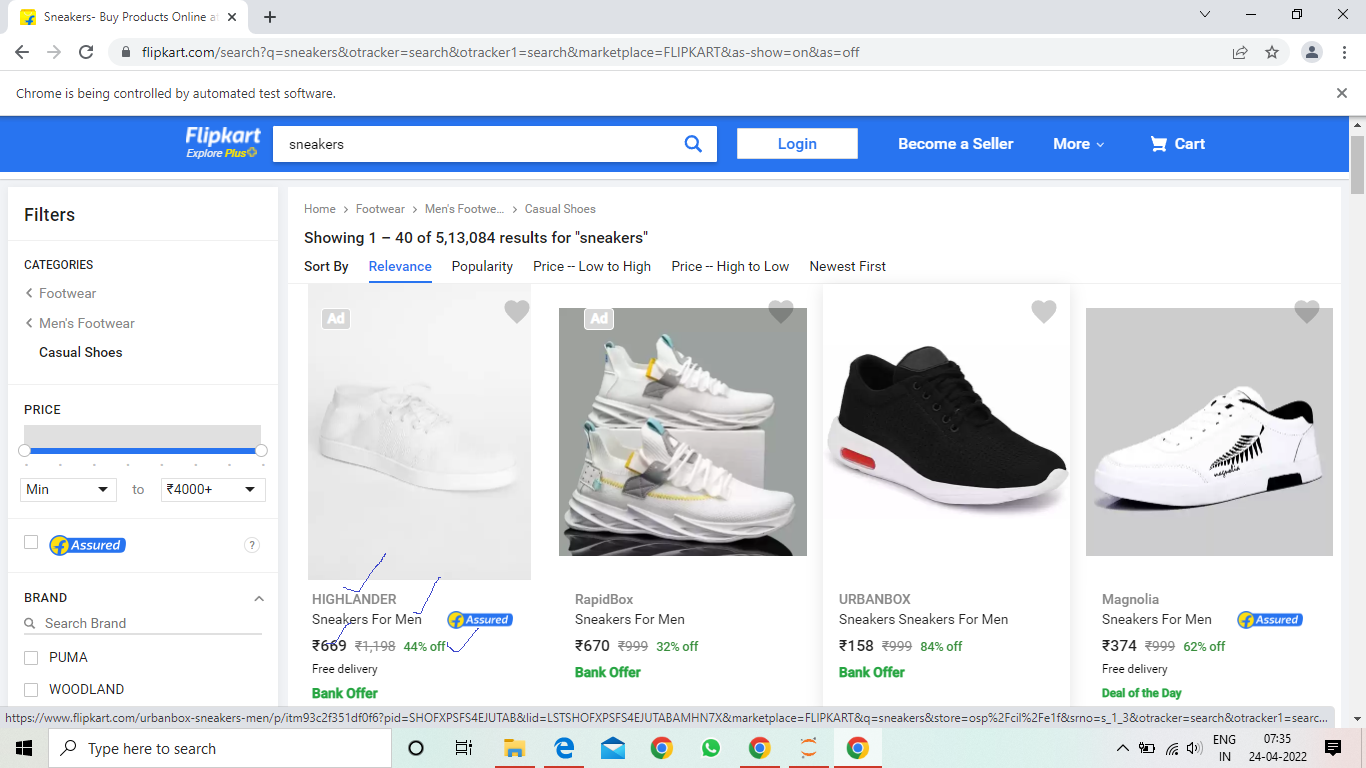

###### 1.Go to Flipkart webpage by url : https://www.flipkart.com

In [2]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.flipkart.com')

###### 2. Go to sreach bar and search the sneakers

In [3]:
search_bar_tag=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search_bar_tag.send_keys('sneakers')
search_tag=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search_tag.click()

###### 3.scrape the data like Brand,prodect name,cost,discount

In [4]:
brand=[]
name=[]
cost=[]
discount=[]

In [5]:
brand_tag=driver.find_elements_by_xpath('//div[@class="_2WkVRV"]')
for x in brand_tag:
    brand.append(x.text)

In [10]:
name_tag=driver.find_elements_by_xpath('//div[@class="_2B099V"]/a[1]')
for x in name_tag:
    name.append(x.text)

In [13]:
cost_tag=driver.find_elements_by_xpath('//div[@class="_30jeq3"]')
for x in cost_tag:
    cost.append(x.text.replace('₹',''))

In [16]:
discount_tag=driver.find_elements_by_xpath('//div[@class="_3Ay6Sb"]/span[1]')
for x in discount_tag:
    discount.append(x.text.replace('off',''))

###### 4.Go to next page to scrape more data

In [18]:
next_tag=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[12]/div/div/nav/a[11]')
next_tag.click()

In [19]:
brand_tag=driver.find_elements_by_xpath('//div[@class="_2WkVRV"]')
for x in brand_tag:
    brand.append(x.text)

In [22]:
name_tag=driver.find_elements_by_xpath('//div[@class="_2B099V"]/a[1]')
for x in name_tag:
    name.append(x.text)

In [24]:
cost_tag=driver.find_elements_by_xpath('//div[@class="_30jeq3"]')
for x in cost_tag:
    cost.append(x.text.replace('₹',''))

In [25]:
discount_tag=driver.find_elements_by_xpath('//div[@class="_3Ay6Sb"]/span[1]')
for x in discount_tag:
    discount.append(x.text.replace('off',''))

###### 5.Go to next page for more data

In [28]:
next_tag=driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div[1]/div[2]/div[12]/div/div/nav/a[12]')
next_tag.click()

In [29]:
brand_tag=driver.find_elements_by_xpath('//div[@class="_2WkVRV"]')
for x in brand_tag:
    brand.append(x.text)

In [30]:
name_tag=driver.find_elements_by_xpath('//div[@class="_2B099V"]/a[1]')
for x in name_tag:
    name.append(x.text)

In [31]:
cost_tag=driver.find_elements_by_xpath('//div[@class="_30jeq3"]')
for x in cost_tag:
    cost.append(x.text.replace('₹',''))

In [32]:
discount_tag=driver.find_elements_by_xpath('//div[@class="_3Ay6Sb"]/span[1]')
for x in discount_tag:
    discount.append(x.text.replace('off',''))

###### 6.checking length of all attributes

In [33]:
print(len(brand),len(name),len(cost),len(discount))

120 120 120 120


###### 7.Make DataFrame

In [34]:
sneakers=pd.DataFrame({})
sneakers['Product Brand']=brand
sneakers['Product Name']=name
sneakers['Product Cost']=cost
sneakers['Product Discount']=discount

In [37]:
print('100 sneakers attributes like Brand,Name,Cost,Discount.')
sneakers.head(100)

100 sneakers attributes like Brand,Name,Cost,Discount.


Product Brand                                       Product Name  \
0     HIGHLANDER                                   Sneakers For Men   
1       RapidBox                                   Sneakers For Men   
2       URBANBOX                          Sneakers Sneakers For Men   
3       Magnolia                                   Sneakers For Men   
4         Chevit  Super Stylish & Trendy Combo Pack of 02 Pairs ...   
..           ...                                                ...   
95      Roadster                                   Sneakers For Men   
96          aadi                                   Sneakers For Men   
97          aadi                                   Sneakers For Men   
98         BIRDE              Sports Running Shoes Sneakers For Men   
99      RapidBox                                   Sneakers For Men   

   Product Cost Product Discount  
0           669             44%   
1           670             32%   
2           158             84%   
3           374             62%   
4           599             62%   
..          ...              ...  
95        1,034             65%   
96          349             65%   
97          349             82%   
98          269             73%   
99          630             36%   

[100 rows x 4 columns]

In [38]:
#close the web driver
driver.close()

Q7: Go to the link - https://www.myntra.com/shoes Set Price filter to “Rs. 7149 to Rs. 14099 ” , Color filter to “Black”, as shown inthe below image. 

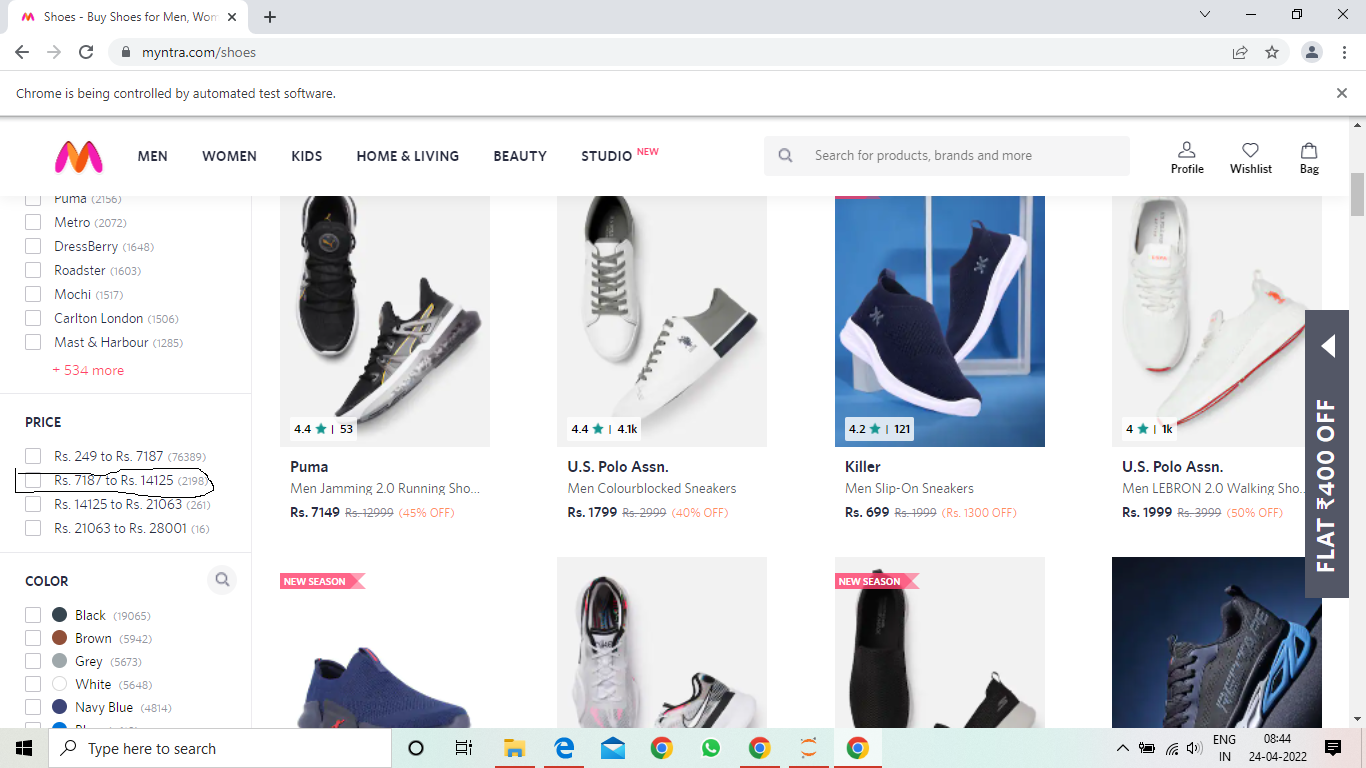

And then scrape First 100 shoes data you get. The data should include “Brand” of the shoes , Short Shoe description, price of the shoe as shown in the below image. 

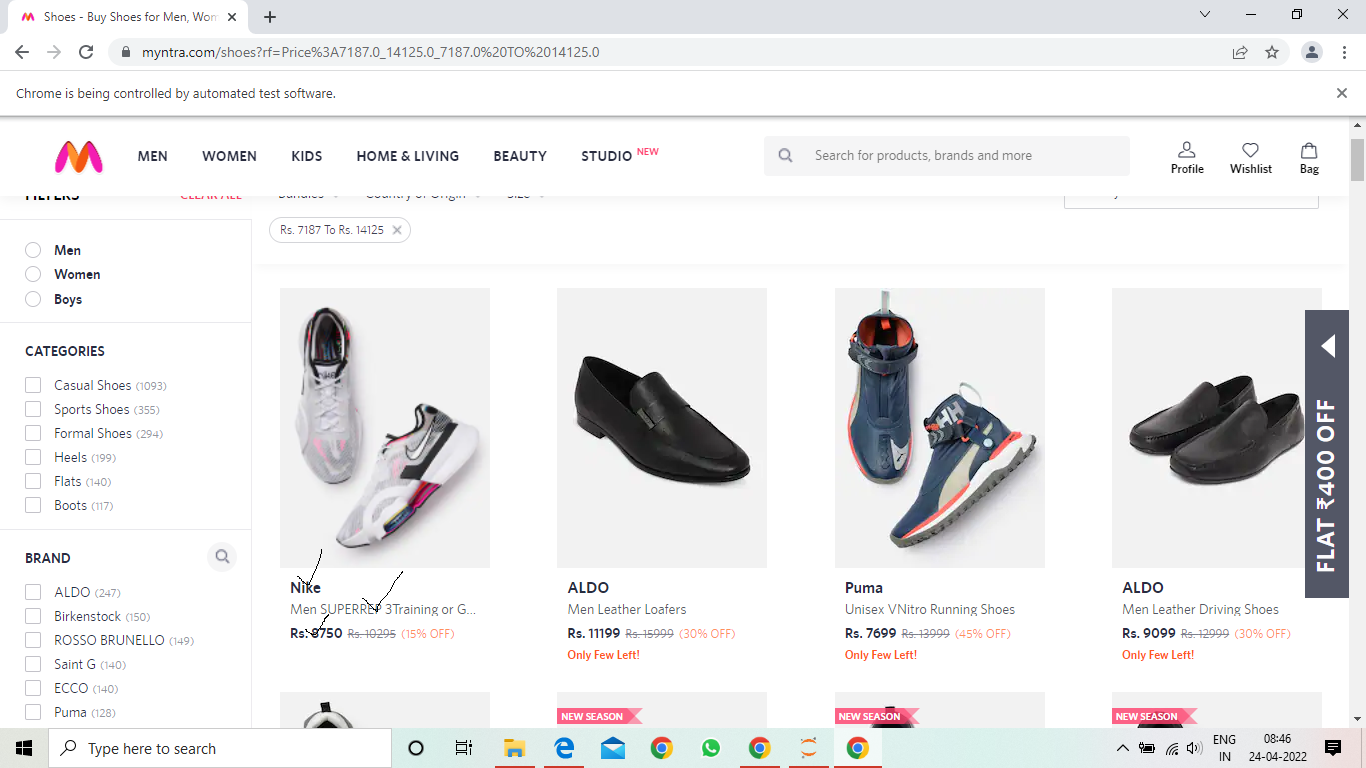

###### 1.Go to Flipkart webpage by url : https://www.myntra.com/shoes

In [70]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get(' https://www.myntra.com/shoes ')

###### 2.Apply filters set Price as  Rs.7149 to 14099

In [71]:
price_tags=driver.find_element_by_xpath('/html/body/div[2]/div/div[1]/main/div[3]/div[1]/section/div/div[5]/ul/li[2]/label/div')
price_tags.click()

###### 3.Scrape data like Brand,Name,Cost

In [72]:
brand=[]
name=[]
cost=[]

In [73]:
brand_tag=driver.find_elements_by_xpath('//h3[@class="product-brand"]')
for x in brand_tag:
    brand.append(x.text)

In [74]:
name_tag=driver.find_elements_by_xpath('//h4[@class="product-product"]')
for x in name_tag:
    name.append(x.text)

In [78]:
cost_tag=driver.find_elements_by_xpath('//div[@class="product-price"]/span[1]')
for x in cost_tag:
    cost.append(x.text.replace('Rs. ',''))

In [79]:
print(len(brand),len(name),len(cost))

50 50 50


###### 4. Go to next page for more data

In [80]:
next_tag=driver.find_element_by_xpath('/html/body/div[2]/div/div[1]/main/div[3]/div[2]/div/div[2]/section/div[2]/ul/li[12]/a')
next_tag.click()

In [81]:
brand_tag=driver.find_elements_by_xpath('//h3[@class="product-brand"]')
for x in brand_tag:
    brand.append(x.text)

In [82]:
name_tag=driver.find_elements_by_xpath('//h4[@class="product-product"]')
for x in name_tag:
    name.append(x.text)

In [83]:
cost_tag=driver.find_elements_by_xpath('//div[@class="product-price"]/span[1]')
for x in cost_tag:
    cost.append(x.text.replace('Rs. ',''))

###### 4.Check length of all attributes

In [84]:
print(len(brand),len(name),len(cost))

100 100 100


###### 5.Make DataFrame with Brand Name,Product Name,Product Price

In [85]:
shoes=pd.DataFrame({})
shoes['Brand Name']=brand
shoes['Product Name']=name
shoes['Product Cost']=cost

In [86]:
print('100 shoes with 7000 to 17000 price')
shoes

100 shoes with 7000 to 17000 price


Brand Name                    Product Name Product Cost
0        Nike   Men SUPERREP 3Training or Gym    875010295
1        ALDO             Men Leather Loafers   1119915999
2        Puma     Unisex VNitro Running Shoes    769913999
3        ALDO       Men Leather Driving Shoes    909912999
4        Nike       Men Air Max 2021 Sneakers   1199614995
..        ...                             ...          ...
95    Bugatti  Men Solid Leather Formal Shoes         9499
96       FILA      Men Colourblocked Sneakers        11999
97     Clarks              Men Leather Derbys         7499
98   Cobblerz   Men Leather Formal Monk Shoes    989910999
99      ASICS               Men Running Shoes         9999

[100 rows x 3 columns]

In [89]:
#close the driver
driver.close()

Q8: Go to webpage https://www.amazon.in/ Enter “Laptop” in the search field and then click the search icon. Then set CPU Type filter to “Intel Core i7” and “Intel Core i9” as shown in the below image: 

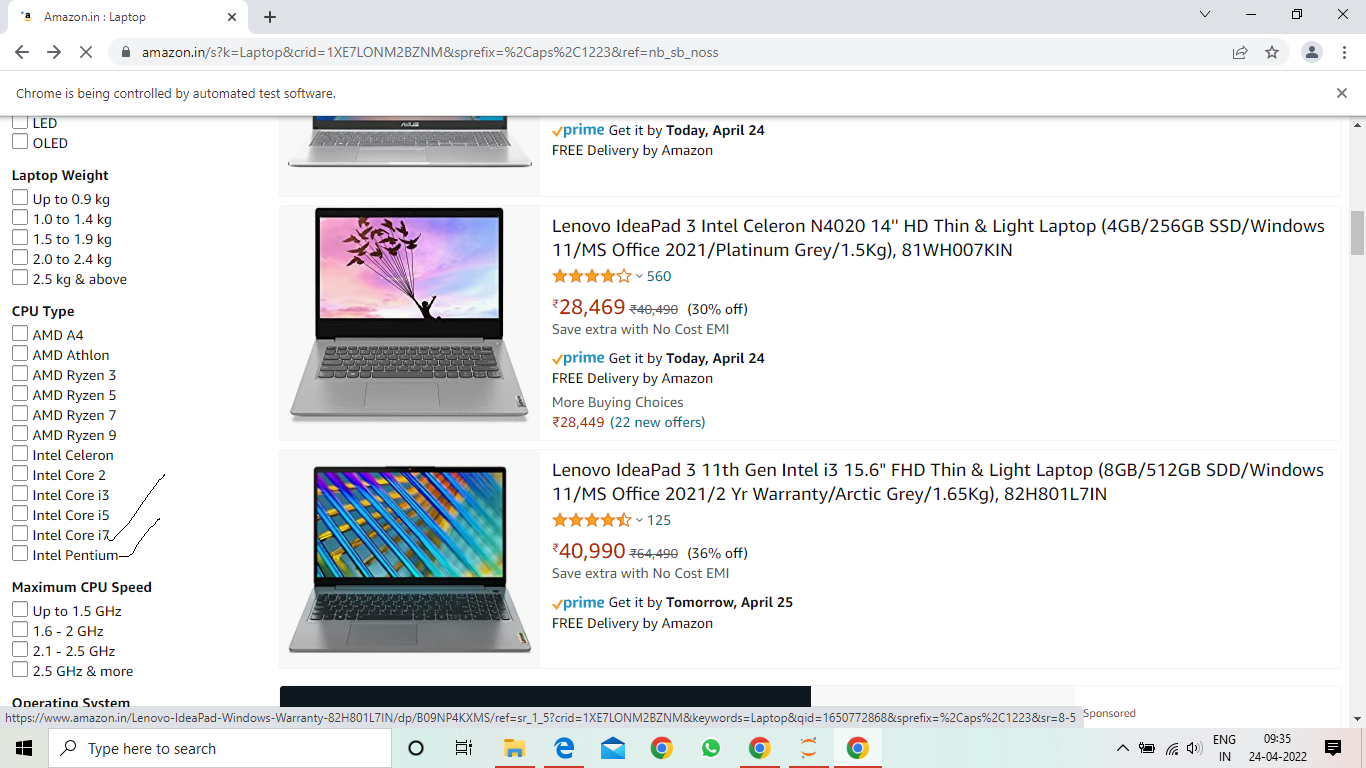

After setting the filters scrape first 10 laptops data.

You have to scrape 3 attributesfor each laptop: 
1. Title 
2. Ratings 
3. Price 

As shown in the below image as the tick marked attributes. 

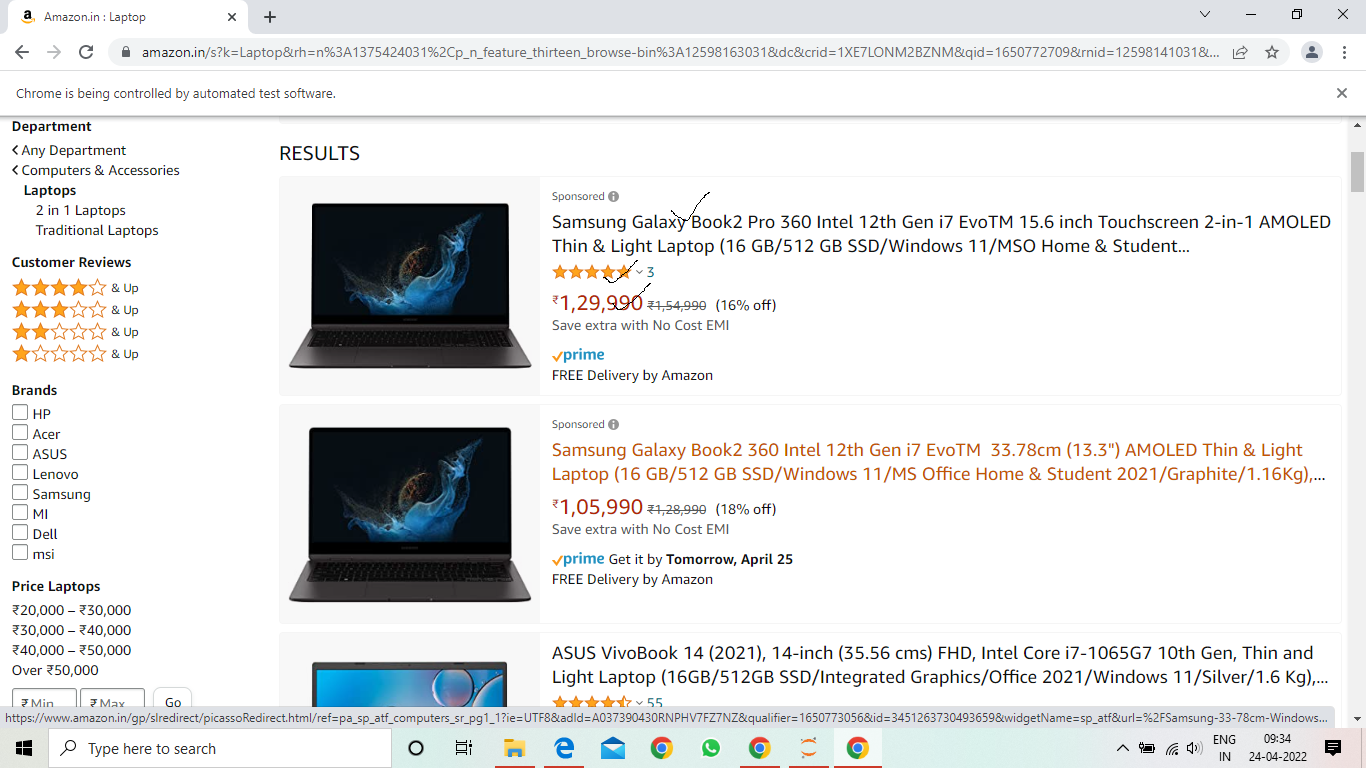

###### 1.Go to amazon link: https://www.amazon.in

In [3]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.amazon.in')

###### 2.Go to sreach bar type laptop and search

In [4]:
#for search bar
search_bar=driver.find_element_by_xpath('/html/body/div[2]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_bar.send_keys('Laptop')
#search for button
search=driver.find_element_by_xpath('/html/body/div[2]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search.click()

###### 3.Goto filter set CPU Type filter to “Intel Core i7”

In [5]:
filter_i7_tag=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div[2]/div/div[3]/span/div[1]/div/div/div[6]/ul[4]/li[12]/span/a/div/label/i')
filter_i7_tag.click()

###### 4.Scrape data like Title,Ratings,Price.

In [6]:
title=[]
title_tag=driver.find_elements_by_xpath('//span[@class="a-size-medium a-color-base a-text-normal"]')
for x in title_tag:
    title.append(x.text)

In [7]:
title=title[0:10]

In [8]:
price=[]
price_tag=driver.find_elements_by_xpath('//span[@class="a-price-whole"]')
for x in price_tag:
    price.append(x.text)

In [9]:
price=price[0:10]

###### 5.Create Dataframe

In [12]:
laptop=pd.DataFrame({})
laptop['Laptop Name']=title
laptop['Laptop Price']=price

In [13]:
laptop

Laptop Name Laptop Price
0  LG Gram 14 inches Ultra-Light Intel Evo 11th G...       88,499
1  LG Gram Intel Evo 11th Gen Core i7 17 inches U...       93,999
2  Lenovo ThinkBook 15 Intel 11th Gen Core i7 15....       86,990
3  ASUS VivoBook 14 (2021), 14-inch (35.56 cms) F...       57,490
4  HP Pavilion 14, 11th Gen Intel Core i7-16GB RA...       86,990
5  LG Gram 16 inches Intel Evo 11th Gen Core i7 U...       89,611
6  HP Pavilion x360 11th Gen Intel Core i7 14 inc...       86,990
7  Lenovo IdeaPad Gaming 3 Intel Core i7 10th Gen...       68,990
8  LG Gram Intel Evo 11th Gen Core i7 17 inches U...       93,999
9  ASUS TUF Gaming F15 (2021) 15.6-inch (39.62 cm...       92,990

In [14]:
#close driver
driver.close()

Q9: Write a python program to scrape data for first 10 job results for Data Scientist Designation in Noida location.

You have to scrape company name, No. of days ago when job was posted, Rating of the company.

This task will be done in following steps: 
1. First get the webpage https://www.ambitionbox.com/ 
2. Click on the Job option as shown in the image 

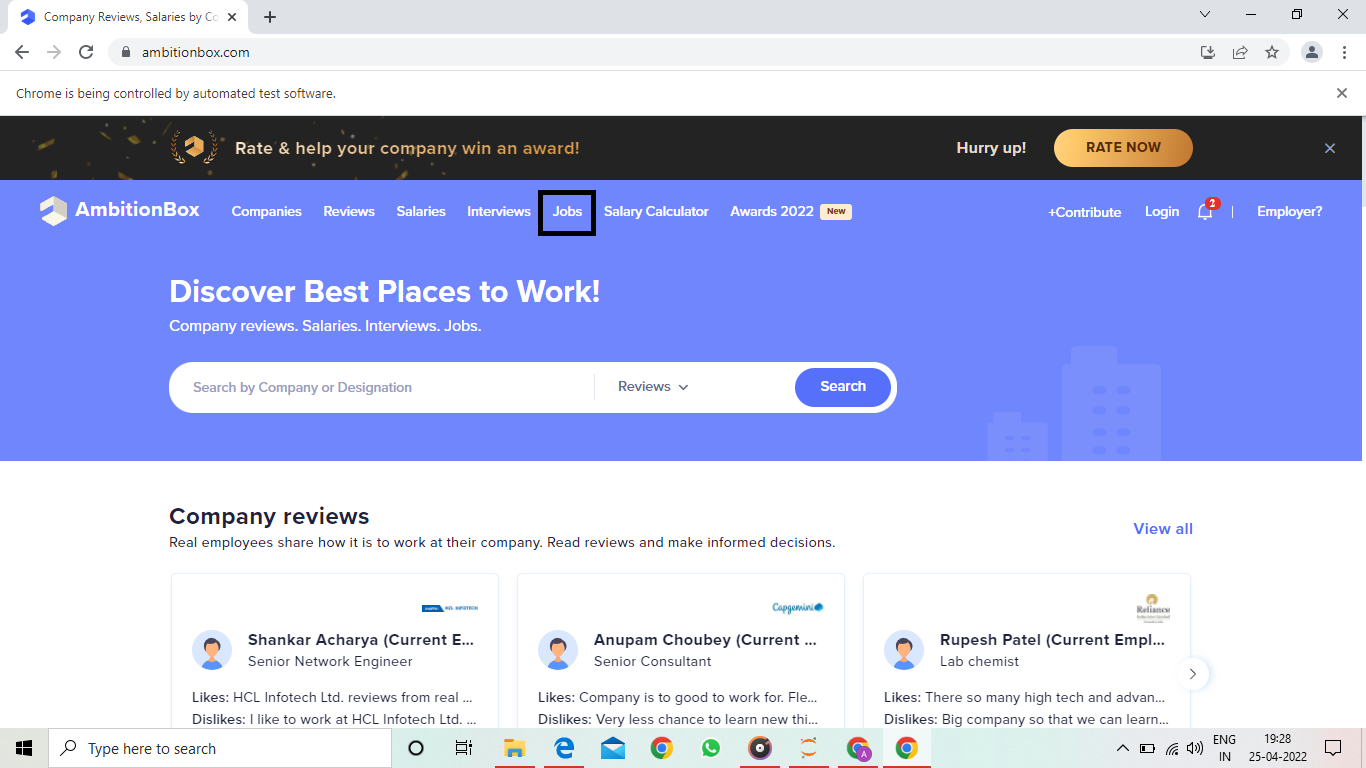

3. After reaching to the next webpage, In place of “Search by Designations, Companies, Skills” enter “Data Scientist” and click on search button. 
4. You will reach to the following web page click on location and in place of “Search location” enter “Noida” and select location “Noida”. 

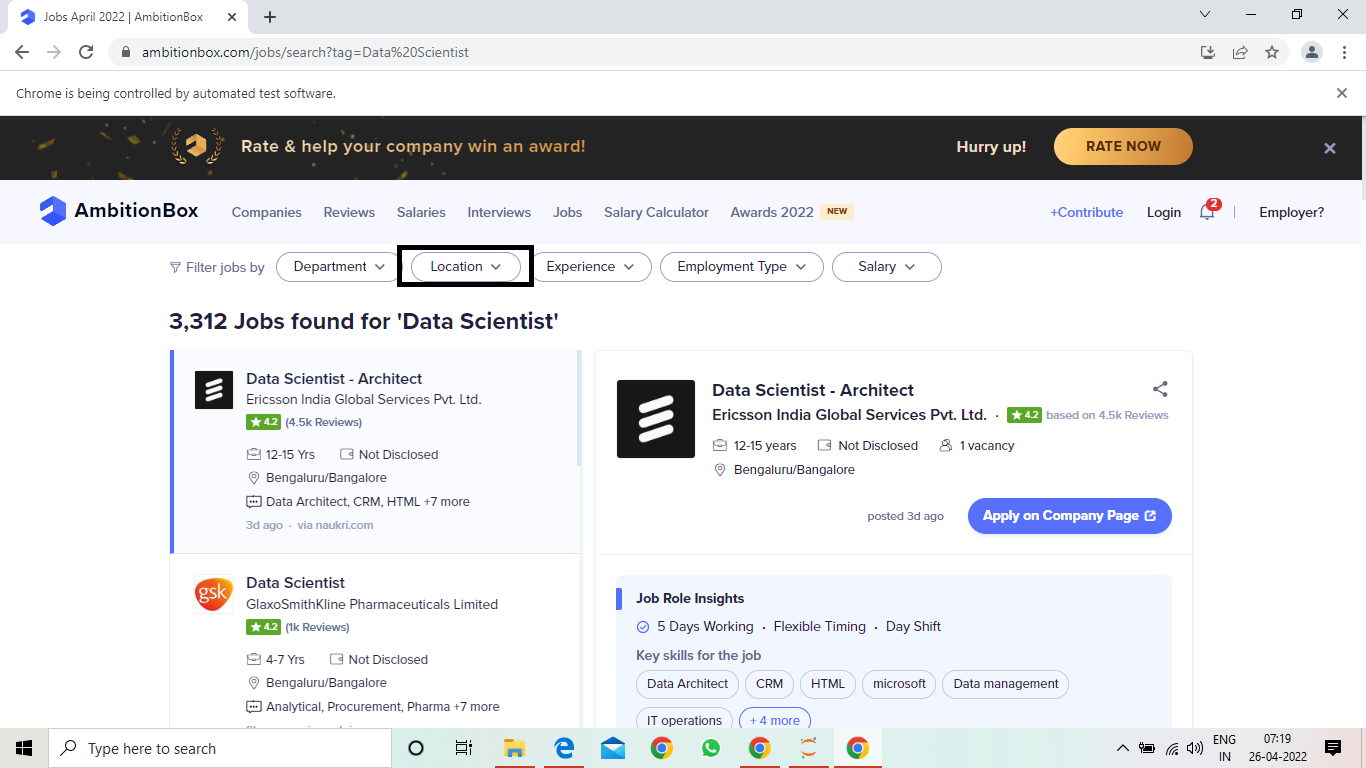

5. Then scrape the data for the first 10 jobs results you get on the above shown page. 
6. Finally create a dataframe of the scraped data.

###### 1.First get the webpage https://www.ambitionbox.com/

In [2]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.ambitionbox.com')

###### 2.Click on the Job option as shown in the image

In [3]:
#select the job option
job_option=driver.find_element_by_xpath('/html/body/div[1]/nav/nav/a[6]')
job_option.click()

###### 3.After reaching to the next webpage, In place of “Search by Designations, Companies, Skills” enter “Data Scientist” and click on search button.

In [4]:
search_bar=driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div[1]/div/div/div/div/span/input')
search_bar.send_keys('Data Scientist')
search=driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div[1]/div/div/div/button/span')
search.click()

###### 4.You will reach to the following web page click on location and in place of “Search location” enter “Noida” and select location “Noida”.

In [5]:
location=driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div[1]/div[2]/div[1]/div/div/div/div[2]/div[2]/div/div[3]/div[1]/div[1]/div/label')
location.click()

###### 5.Then scrape the data for the first 10 jobs results you get on the above shown page.

In [6]:
title=[]
title_tag=driver.find_elements_by_xpath('//a[@class="title noclick"]')
for x in title_tag:
    title.append(x.text)

In [9]:
company=[]
company_tag=driver.find_elements_by_xpath('//p[@class="company body-medium"]')
for x in company_tag:
    company.append(x.text)

In [11]:
rating=[]
rating_tag=driver.find_elements_by_xpath('//span[@class="body-small"]')
for x in rating_tag:
    rating.append(x.text)

In [35]:
review=[]
review_tag=driver.find_elements_by_xpath('//a[@class="review-count caption-strong-medium"]')
for x in review_tag:
    review.append(x.text.replace('(','').replace(')','').replace('Reviews',''))

###### 6.Finally create a dataframe of the scraped data.

In [36]:
job=pd.DataFrame({})
job['Job title']=title
job['Company Name']=company
job['Rating']=rating
job['reviews']=review

In [37]:
job

Job title  \
0                                     Data Scientist   
1                            Data Scientist with SAS   
2  Hiring For Data Scientist + Python/R+ Predicti...   
3      Urgent Requirement || Data Scientist || Noida   
4       Data Scientist - Machine Learning (5-14 yrs)   
5  Data Scientist- Fresher Opening - Newgen Softw...   
6                              Senior Data Scientist   
7                      Data Analyst / Data Scientist   
8                                  Data Scientist-II   
9                                     Data Scientist   

                        Company Name Rating reviews  
0      GENPACT India Private Limited    4.0  16.8k   
1                  Tech Mahindra Ltd    3.7  17.1k   
2      GENPACT India Private Limited    4.0  16.8k   
3                   HCL Technologies    3.8    18k   
4                              Zyoin    4.1     72   
5  Newgen Software Technologies Ltd.    3.5    490   
6         Pitney Bowes India Pvt Ltd    4.2    114   
7                  JK Technosoft Ltd    3.6    301   
8  Microsoft India (R and D) Pvt Ltd    4.3    628   
9        Paytm Payments Bank Limited    3.7   3.7k

In [39]:
#close the driver
driver.close()

Q10: Write a python program to scrape the salary data for Data Scientist designation. You have to scrape Company name, Number of salaries, Average salary, Minsalary, Max Salary. 

The above task will be, done as shown in the below steps:

1. First get the webpage https://www.ambitionbox.com/ 
2. Click on the salaries option as shown in the image. 

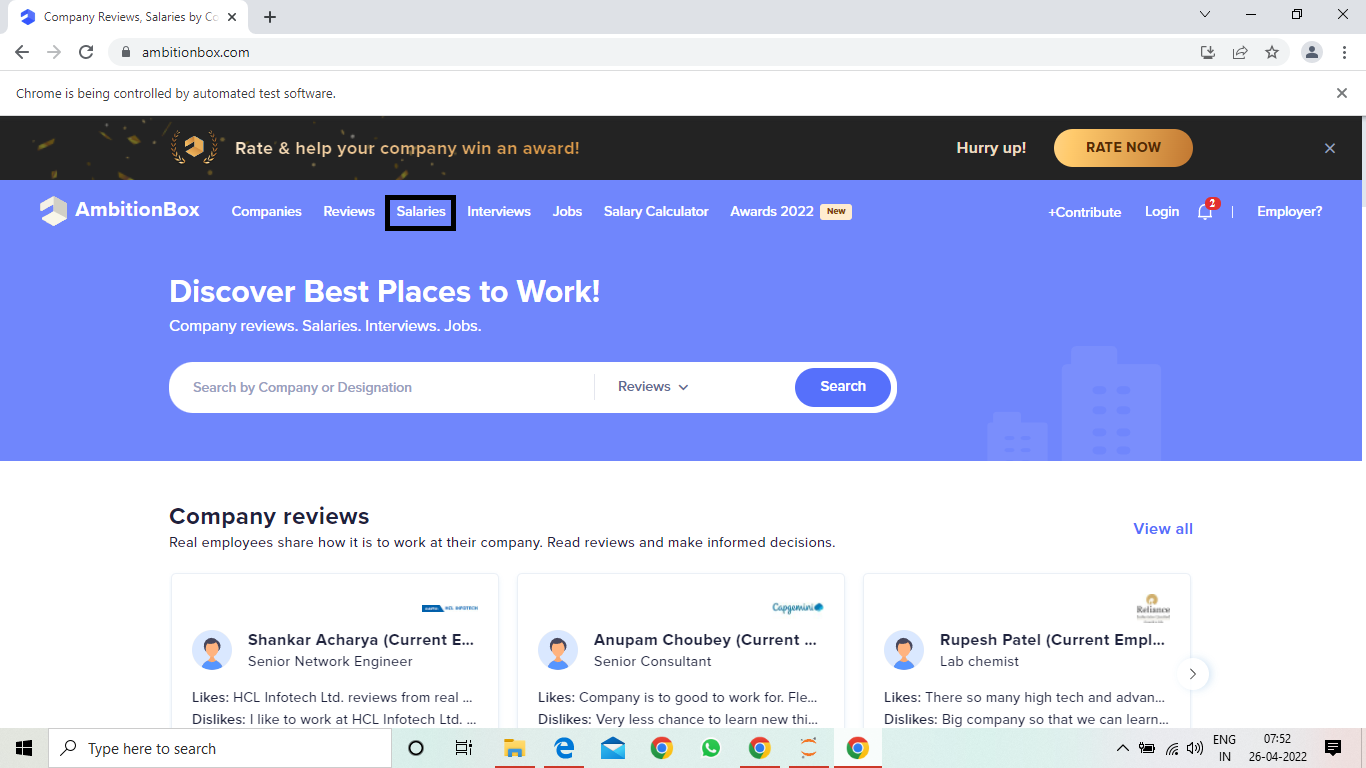

3. After reaching to the following webpage, In place of “Search Job Profile” enters “Data Scientist” and then click on “Data Scientist”. 

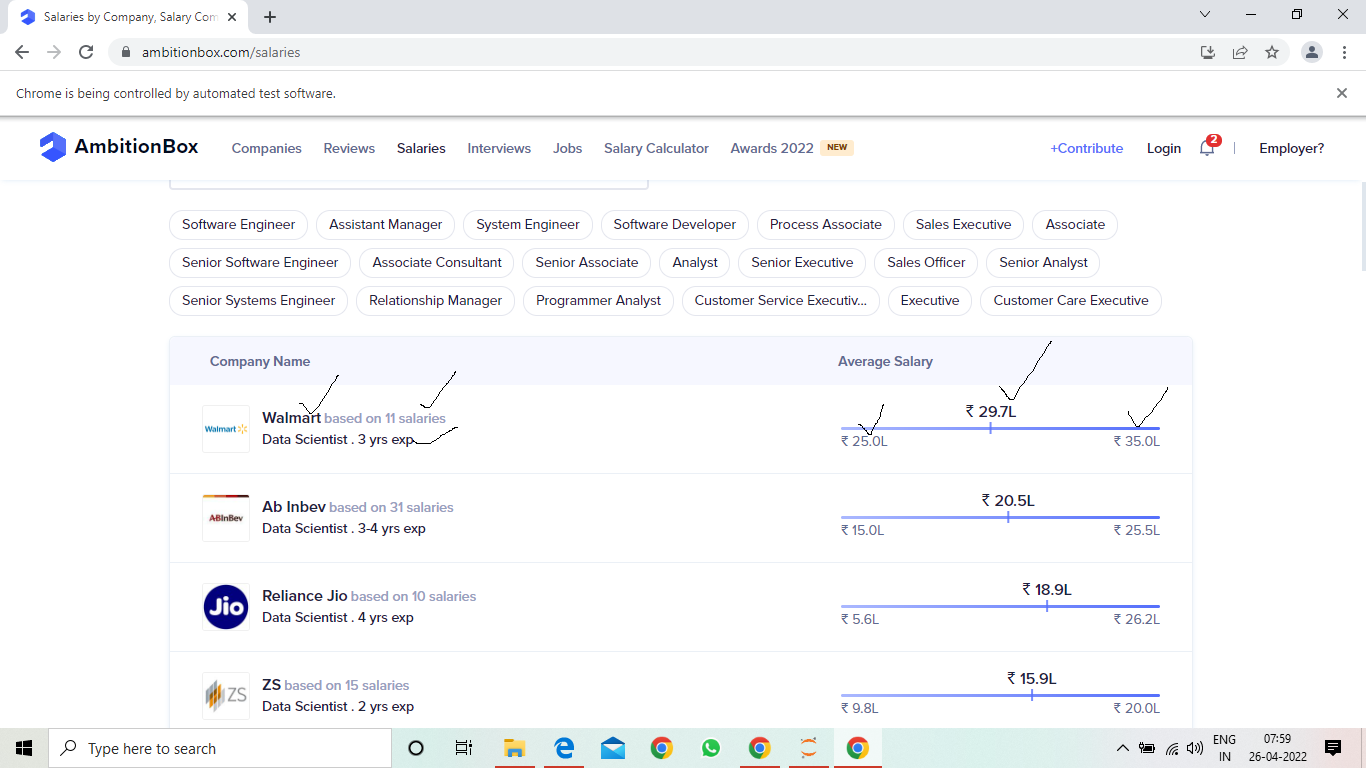

You have to scrape the data ticked in the above image. 

4. Scrape the data for the first 10 companies. Scrape the company name, total salary record, average salary, minimum salary, maximum salary, experience required. 
5. Store the data in a dataframe. 

###### 1.First get the webpage https://www.ambitionbox.com/

In [40]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.ambitionbox.com')

###### 2.Click on the salaries option as shown in the image.

In [41]:
#click the salary option
salary=driver.find_element_by_xpath('/html/body/div[1]/nav/nav/a[4]')
salary.click()

###### 3.After reaching to the following webpage, In place of “Search Job Profile” enters “Data Scientist” and then click on “Data Scientist”.

In [44]:
search_bar=driver.find_element_by_xpath('/html/body/div/div/div/main/section[1]/div[2]/div[1]/span/input')
search_bar.send_keys('Data Scientist')

###### 4.Scrape the data for the first 10 companies. Scrape the company name, total salary record, average salary, minimum salary, maximum salary, experience required.

In [45]:
#company name
name=[]
name_tag=driver.find_elements_by_xpath('//div[@class="name"]/a[1]')
for x in name_tag:
    name.append(x.text)

In [49]:
#total salary record
total_salary=[]
total_salary_tag=driver.find_elements_by_xpath('//p[@class="averageCtc"]')
for x in total_salary_tag:
    total_salary.append(x.text.replace('₹ ',''))

In [70]:
#minimum salary
min_salary=[]
min_salary_tag=driver.find_elements_by_xpath('//div[@class="salary-values"]/div[1]')
for x in min_salary_tag:
    min_salary.append(x.text.replace('₹ ',''))

In [71]:
#max salary
max_salary=[]
max_salary_tag=driver.find_elements_by_xpath('//div[@class="salary-values"]/div[2]')
for x in max_salary_tag:
    max_salary.append(x.text.replace('₹ ',''))

In [61]:
#Experience
experience=[]
experience_tag=driver.find_elements_by_xpath('//div[@class="salaries sbold-list-header"]')
for x in experience_tag:
    experience.append(x.text.replace('Data Scientist\n . \n','').replace(' exp',''))

In [66]:
#based on other salaries
based_salary=[]
based_salary_tag=driver.find_elements_by_xpath('//div[@class="name"]/span[1]')
for x in based_salary_tag:
    based_salary.append(x.text.replace('based on ','').replace(' salaries',''))

###### 5.Store the data in a dataframe.

In [72]:
job=pd.DataFrame({})
job['Company Name']=name
job['Based on number of other salaries']=based_salary
job['Experience']=experience
job['Minimum Salary']=min_salary
job['Maximum Salary']=max_salary
job['Total Saalary']=total_salary

In [73]:
job

Company Name Based on number of other salaries Experience  \
0                   Walmart                                11      3 yrs   
1                  Ab Inbev                                31    3-4 yrs   
2              Reliance Jio                                10      4 yrs   
3                        ZS                                15      2 yrs   
4                     Optum                                28    3-4 yrs   
5         Fractal Analytics                                81    2-4 yrs   
6           Tiger Analytics                                46    2-4 yrs   
7              UnitedHealth                                53    2-4 yrs   
8                   Verizon                                14      4 yrs   
9  Ganit Business Solutions                                13      4 yrs   

  Minimum Salary Maximum Salary Total Saalary  
0          25.0L          35.0L         29.7L  
1          15.0L          25.5L         20.5L  
2           5.6L          26.2L         18.9L  
3           9.8L          20.0L         15.9L  
4          11.0L          22.4L         15.4L  
5           9.5L          22.0L         15.1L  
6           9.0L          20.0L         14.8L  
7           8.3L          20.5L         14.0L  
8          10.0L          21.0L         12.7L  
9           8.5L          15.0L         12.4L

In [74]:
#close the driver
driver.close()